In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

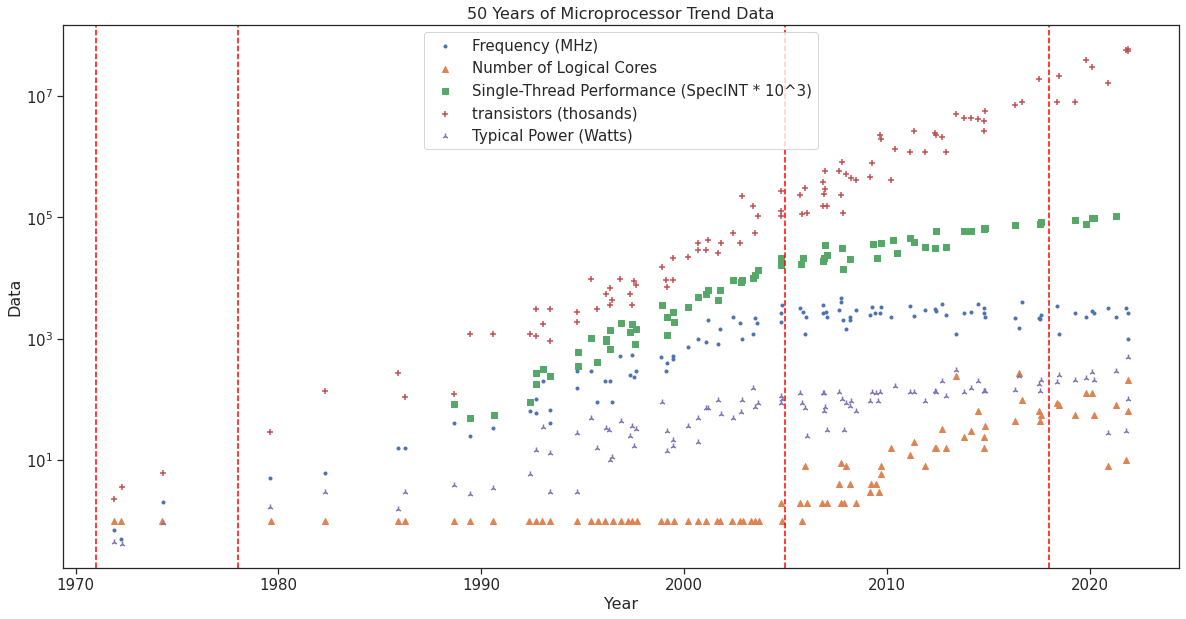

In [2]:
def merge(list1, list2):
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
    return merged_list

def get_data_lists(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        year_list = []
        data_list = []
        for line in lines:
            if "##" in line:
                continue
            year_list.append(float(line.split()[0]))         
            data_list.append(float(line.split()[1]))
    return year_list, data_list          
year_freq, data_freq = get_data_lists("./D-1/frequency.dat")
year_cores, data_cores = get_data_lists("./D-1/cores.dat")
year_specint, data_specint = get_data_lists("./D-1/specint.dat")
year_transistors, data_transistors = get_data_lists("./D-1/transistors.dat")
year_watts, data_watts = get_data_lists("./D-1/watts.dat")

# sns.set()
sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(20,10))

plt.scatter(year_freq, data_freq, label="Frequency (MHz)", marker=".")
plt.scatter(year_cores, data_cores, label="Number of Logical Cores", marker="^")
plt.scatter(year_specint, data_specint, label="Single-Thread Performance (SpecINT * 10^3)", marker="s")
plt.scatter(year_transistors, data_transistors, label="transistors (thosands)", marker="+")
plt.scatter(year_watts, data_watts, label="Typical Power (Watts)", marker="2")

ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Data', fontsize=16)
ax.set_title('50 Years of Microprocessor Trend Data', fontsize=16)

yticks = [pow(10, i) for i in range(8)]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=15)
xticks = [1970 + i*10 for i in range(6)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=15)
ax.legend(fontsize=15)
plt.yscale('log')


for x in [1971, 1978, 2005, 2018]:
    plt.axvline(x=x, color='red', linestyle='--')

plt.show()

In the above figure we have four phases of the development microprocessor:
* Early computer standalone transistors manually designed.  
* Moore's law is in effect, and micro-architectures are developed.
* Multicore comes to play.
* Specialized hardware.

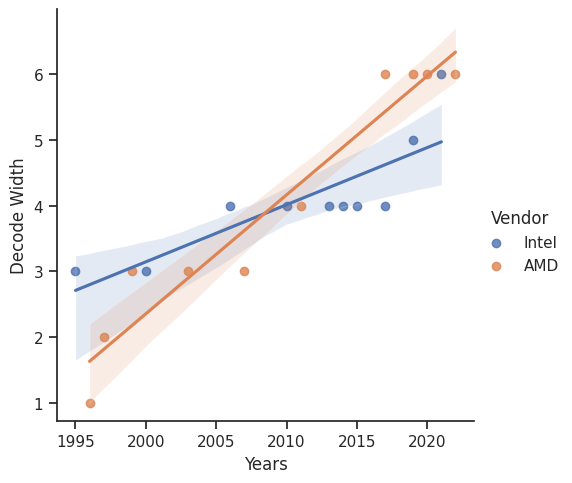

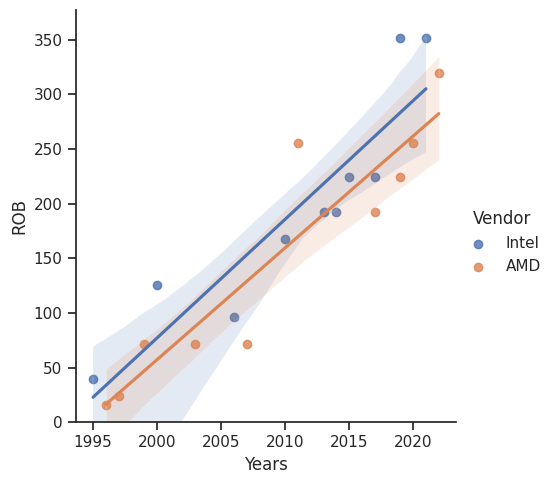

In [42]:
csv = pandas.read_csv('processor_metadata.csv', encoding= 'utf-8')

sns.set_theme(style="ticks")

sns.lmplot(data=csv, x="Years", y="Decode Width", hue="Vendor")
# sns.lmplot(data=csv, x="Years", y="ALU Count", hue="Vendor", robust=True)
# sns.lmplot(data=csv, x="Years", y="AGU Count", hue="Vendor", robust=True)
rob = sns.lmplot(data=csv, x="Years", y="ROB", hue="Vendor")
rob.set(ylim=(0, None))
# sns.lmplot(data=csv, x="Years", y="Int. Scheduler", hue="Vendor", robust=True)



